In [17]:
import json

with open('results.json') as f:
    results = json.load(f)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [20]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blue: 0.8709
	2. four: 0.6747
	3. <pad>: 0.4314
	4. round: 0.1819
	5. is: 0.1738
	6. three: 0.0513
	7. red: 0.0256
	8. green: 0.0256
	9. has: 0.0256
	10. angle: 0.0256

Top-n images with largest absolute values of logits:


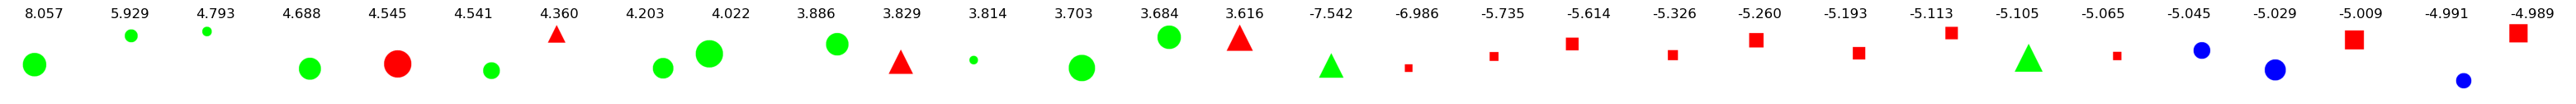

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. position: 0.7844
	2. <pad>: 0.2110
	3. round: 0.1491
	4. is: 0.1351
	5. left: 0.0643
	6. blank: 0.0363
	7. four: 0.0000
	8. has: 0.0000
	9. angle: 0.0000
	10. three: 0.0000

Top-n images with largest absolute values of logits:


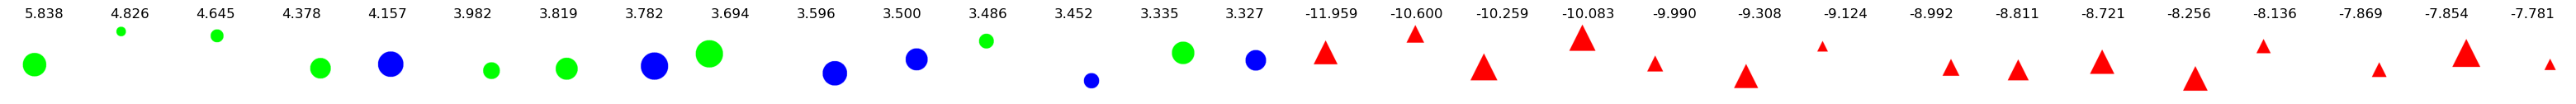

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.5581
	2. green: 0.2410
	3. blue: 0.2391
	4. three: 0.1875
	5. round: 0.1662
	6. <pad>: 0.1461
	7. bottom: 0.1222
	8. shape: 0.1211
	9. is: 0.0883
	10. white: 0.0542

Top-n images with largest absolute values of logits:


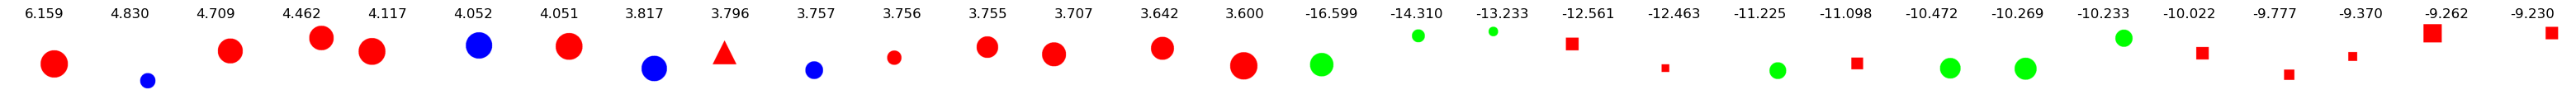

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. white: 0.1609
	2. canvas: 0.1567
	3. blank: 0.1539
	4. rotate: 0.1431
	5. left: 0.1372
	6. three: 0.1284
	7. bottom: 0.1275
	8. shape: 0.1002
	9. this: 0.0863
	10. has: 0.0742

Top-n images with largest absolute values of logits:


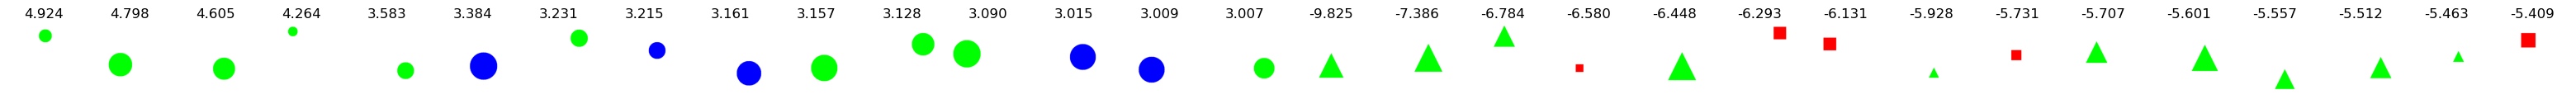

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. this: 0.2710
	2. four: 0.2375
	3. red: 0.2234
	4. color: 0.1684
	5. has: 0.1615
	6. right: 0.1083
	7. shape: 0.0984
	8. <pad>: 0.0963
	9. position: 0.0669
	10. bottom: 0.0440

Top-n images with largest absolute values of logits:


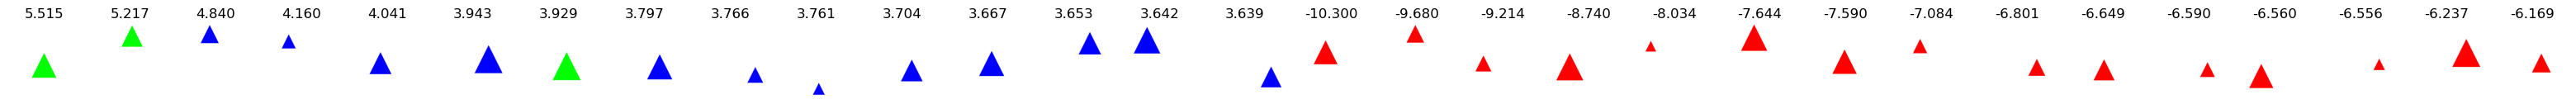

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. four: 0.6074
	2. round: 0.5503
	3. red: 0.5374
	4. green: 0.4461
	5. <pad>: 0.1657
	6. color: 0.1217
	7. this: 0.0761
	8. has: 0.0498
	9. three: 0.0000
	10. blue: 0.0000

Top-n images with largest absolute values of logits:


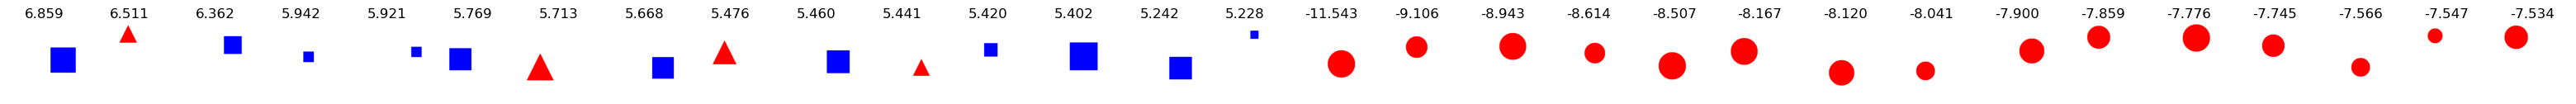

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.3452
	2. <pad>: 0.2193
	3. has: 0.2104
	4. shape: 0.1942
	5. color: 0.1801
	6. bottom: 0.1021
	7. left: 0.0845
	8. position: 0.0811
	9. this: 0.0777
	10. blue: 0.0332

Top-n images with largest absolute values of logits:


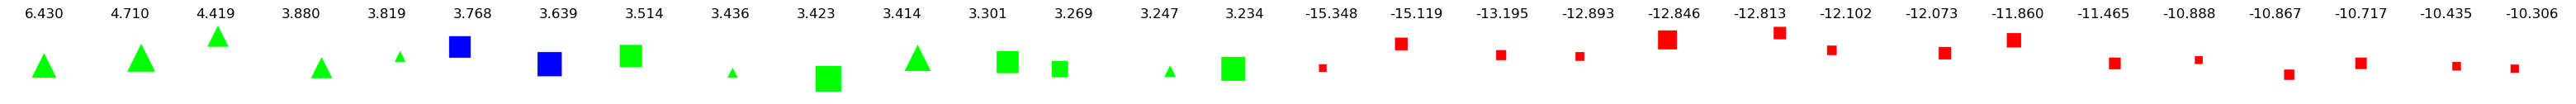

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. four: 0.3202
	2. color: 0.3080
	3. red: 0.2089
	4. is: 0.2041
	5. has: 0.1853
	6. position: 0.1752
	7. <pad>: 0.1193
	8. canvas: 0.0619
	9. green: 0.0597
	10. blue: 0.0345

Top-n images with largest absolute values of logits:


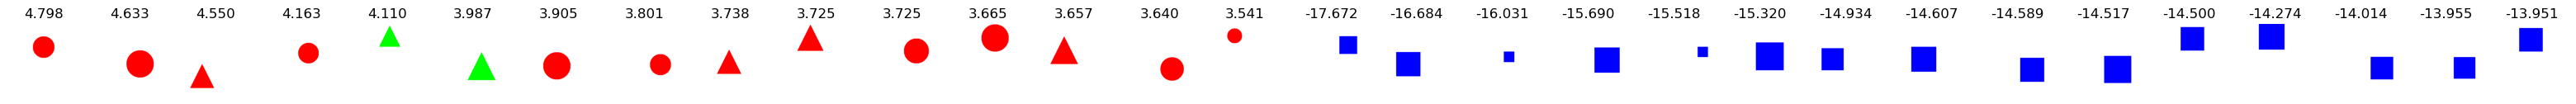

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. green: 0.5603
	2. <pad>: 0.3299
	3. has: 0.3020
	4. angle: 0.2751
	5. four: 0.1763
	6. shape: 0.1716
	7. red: 0.0549
	8. bottom: 0.0501
	9. this: 0.0433
	10. round: 0.0006

Top-n images with largest absolute values of logits:


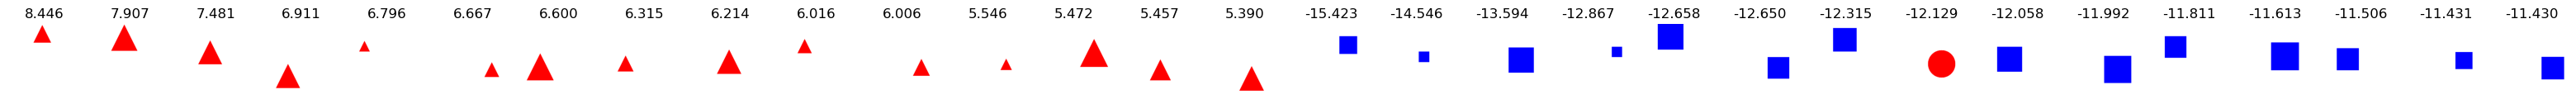

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. is: 0.3279
	2. this: 0.2751
	3. green: 0.1793
	4. four: 0.1721
	5. round: 0.1588
	6. red: 0.1466
	7. shape: 0.1438
	8. canvas: 0.1214
	9. <pad>: 0.1081
	10. white: 0.0836

Top-n images with largest absolute values of logits:


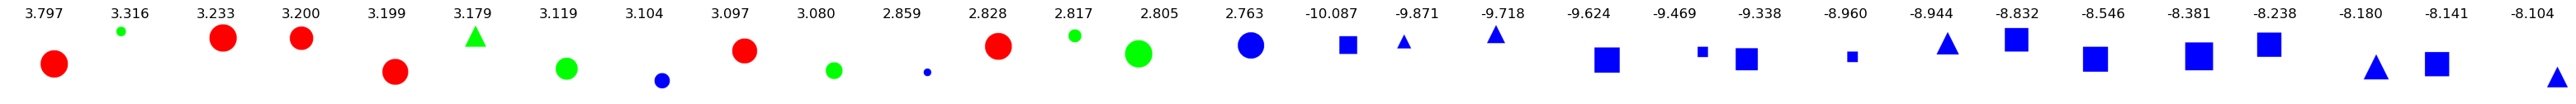

----------------------------------------------------------------------------------------------------


In [21]:
for i in range(10):
    visualize_concept(i)